In [57]:
#import the library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [58]:
df = pd.read_excel(r'E:\_Portofolio\PortofolioProject\NashvilleHouseData\Nashville Data.xlsx')
df

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2538,119 06 0 179.00,SINGLE FAMILY,92000,20130604-0056132,No,"CIRKVENCIC, STEPHEN JOSEPH",0.27,18000.0,69300.0,...,1949.0,2.0,1.0,0.0,2013-05-31,73 JAY ST,NASHVILLE,73 JAY ST,NASHVILLE,TN
1,53782,119 06 0 180.00,SINGLE FAMILY,130000,20160915-0097052,No,"HUGHES, BRIAN",0.27,18000.0,87100.0,...,1949.0,3.0,1.0,1.0,2016-09-06,71 JAY ST,NASHVILLE,71 JAY ST,NASHVILLE,TN
2,27480,119 06 0 181.00,SINGLE FAMILY,159600,20150401-0028168,No,"RIBEIRO, DOUGLAS C. & VANESSA",0.27,18000.0,75600.0,...,1949.0,2.0,1.0,0.0,2015-03-31,69 JAY ST,NASHVILLE,69 JAY ST,NASHVILLE,TN
3,47729,119 06 0 182.00,SINGLE FAMILY,187500,20160606-0056939,No,"VILLA PLACE PROPERTIES, LLC",0.27,18000.0,55000.0,...,1949.0,2.0,1.0,0.0,2016-05-27,58 ELBERTA ST,NASHVILLE,58 ELBERTA ST,NASHVILLE,TN
4,20527,119 06 0 187.00,SINGLE FAMILY,99900,20140911-0083250,No,"RUZIC, SARAH C.",0.29,18000.0,133700.0,...,1949.0,3.0,2.0,0.0,2014-09-10,68 ELBERTA ST,NASHVILLE,68 ELBERTA ST,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37264,119 14 0 141.00,SINGLE FAMILY,214900,20150903-0089909,No,"WHITE, KELSEY & WILLIAMSON, JUSTIN R.",0.26,26000.0,141800.0,...,1941.0,3.0,1.0,0.0,2015-09-02,2924 DOBBS AVE,NASHVILLE,2924 DOBBS AVE,NASHVILLE,TN
996,873,119 14 0 143.00,SINGLE FAMILY,175000,20130319-0026957,No,"CODINGTON, PHILIP & RACHEL LEE",0.26,26000.0,85300.0,...,1941.0,4.0,2.0,0.0,2013-03-14,2920 DOBBS AVE,NASHVILLE,2920 DOBBS AVE,NASHVILLE,TN
997,19023,119 14 0 152.00,SINGLE FAMILY,95000,20140804-0069797,No,"WALKER, CHARLES",0.21,26000.0,85100.0,...,1948.0,3.0,2.0,0.0,2014-08-04,2903 TUGGLE AVE,NASHVILLE,2903 TUGGLE AVE,NASHVILLE,TN
998,52475,119 14 0 155.00,SINGLE FAMILY,128000,20160811-0083603,No,"FRANKLIN, PAUL EDWARD & TERESA JAN",0.21,26000.0,78600.0,...,1948.0,2.0,1.0,0.0,2016-08-04,2909 TUGGLE AVE,NASHVILLE,2909 TUGGLE AVE,NASHVILLE,TN


In [59]:
df.isnull().sum()

UniqueID                  0
ParcelID                  0
LandUse                   0
SalePrice                 0
LegalReference            0
SoldAsVacant              0
OwnerName               179
Acreage                 178
LandValue               178
BuildingValue           178
TotalValue              178
YearBuilt               201
Bedrooms                201
FullBath                198
HalfBath                199
SaleDateConverted         0
PropertySplitAddress      0
PropertySplitCity         0
OwnerSplitAddress       178
OwnerSplitCity          178
OwnerSplitState         178
dtype: int64

In [60]:
percentage_na = (201/1000)*100
percentage_na

20.1

Since there are relatively few missing entries in the data (the column with the greatest percentage of missing values is missing less than 20% of its entries), we can expect that dropping columns is unlikely to yield good results. This is because we'd be throwing away a lot of valuable data, and so imputation will likely perform better.

In [61]:
df = df.dropna()
df.isnull().sum()

UniqueID                0
ParcelID                0
LandUse                 0
SalePrice               0
LegalReference          0
SoldAsVacant            0
OwnerName               0
Acreage                 0
LandValue               0
BuildingValue           0
TotalValue              0
YearBuilt               0
Bedrooms                0
FullBath                0
HalfBath                0
SaleDateConverted       0
PropertySplitAddress    0
PropertySplitCity       0
OwnerSplitAddress       0
OwnerSplitCity          0
OwnerSplitState         0
dtype: int64

In [62]:
df.dtypes

UniqueID                         int64
ParcelID                        object
LandUse                         object
SalePrice                        int64
LegalReference                  object
SoldAsVacant                    object
OwnerName                       object
Acreage                        float64
LandValue                      float64
BuildingValue                  float64
TotalValue                     float64
YearBuilt                      float64
Bedrooms                       float64
FullBath                       float64
HalfBath                       float64
SaleDateConverted       datetime64[ns]
PropertySplitAddress            object
PropertySplitCity               object
OwnerSplitAddress               object
OwnerSplitCity                  object
OwnerSplitState                 object
dtype: object

In [63]:
df[['LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath']]

,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,18000.0,69300.0,87300.0,1949.0,2.0,1.0,0.0
1,18000.0,87100.0,109900.0,1949.0,3.0,1.0,1.0
2,18000.0,75600.0,96900.0,1949.0,2.0,1.0,0.0
3,18000.0,55000.0,73000.0,1949.0,2.0,1.0,0.0
4,18000.0,133700.0,161400.0,1949.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...
995,26000.0,141800.0,169300.0,1941.0,3.0,1.0,0.0
996,26000.0,85300.0,114500.0,1941.0,4.0,2.0,0.0
997,26000.0,85100.0,114300.0,1948.0,3.0,2.0,0.0
998,26000.0,78600.0,104600.0,1948.0,2.0,1.0,0.0


In [64]:
df = df.astype({'LandValue': 'int64', 'BuildingValue': 'int64', 'TotalValue': 'int64', 'YearBuilt': 'int64', 'Bedrooms': 'int64', 'FullBath': 'int64', 'HalfBath': 'int64'})

In [65]:
df.dtypes

UniqueID                         int64
ParcelID                        object
LandUse                         object
SalePrice                        int64
LegalReference                  object
SoldAsVacant                    object
OwnerName                       object
Acreage                        float64
LandValue                        int64
BuildingValue                    int64
TotalValue                       int64
YearBuilt                        int64
Bedrooms                         int64
FullBath                         int64
HalfBath                         int64
SaleDateConverted       datetime64[ns]
PropertySplitAddress            object
PropertySplitCity               object
OwnerSplitAddress               object
OwnerSplitCity                  object
OwnerSplitState                 object
dtype: object

In [66]:
df.head()

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2538,119 06 0 179.00,SINGLE FAMILY,92000,20130604-0056132,No,"CIRKVENCIC, STEPHEN JOSEPH",0.27,18000,69300,...,1949,2,1,0,2013-05-31,73 JAY ST,NASHVILLE,73 JAY ST,NASHVILLE,TN
1,53782,119 06 0 180.00,SINGLE FAMILY,130000,20160915-0097052,No,"HUGHES, BRIAN",0.27,18000,87100,...,1949,3,1,1,2016-09-06,71 JAY ST,NASHVILLE,71 JAY ST,NASHVILLE,TN
2,27480,119 06 0 181.00,SINGLE FAMILY,159600,20150401-0028168,No,"RIBEIRO, DOUGLAS C. & VANESSA",0.27,18000,75600,...,1949,2,1,0,2015-03-31,69 JAY ST,NASHVILLE,69 JAY ST,NASHVILLE,TN
3,47729,119 06 0 182.00,SINGLE FAMILY,187500,20160606-0056939,No,"VILLA PLACE PROPERTIES, LLC",0.27,18000,55000,...,1949,2,1,0,2016-05-27,58 ELBERTA ST,NASHVILLE,58 ELBERTA ST,NASHVILLE,TN
4,20527,119 06 0 187.00,SINGLE FAMILY,99900,20140911-0083250,No,"RUZIC, SARAH C.",0.29,18000,133700,...,1949,3,2,0,2014-09-10,68 ELBERTA ST,NASHVILLE,68 ELBERTA ST,NASHVILLE,TN


In [67]:
df.sort_values(by=['SalePrice'], inplace=False, ascending=False)

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
324,41930,025 11 0 009.00,SINGLE FAMILY,450000,20151208-0123531,No,"KONGSAYSY, AARON & HUDSON, NATHANIEL D.",0.95,30000,390300,...,2008,4,4,0,2015-12-03,201 DORA DR,GOODLETTSVILLE,201 DORA DR,GOODLETTSVILLE,TN
158,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.90,50000,216200,...,1987,4,3,0,2016-09-26,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
23,10227,119 06 0 247.00,SINGLE FAMILY,385600,20131226-0129773,No,"MITCHELL, BENJAMIN S. & ANN",0.34,26000,64000,...,1951,2,1,0,2013-12-20,2698 HARTFORD DR,NASHVILLE,2698 HARTFORD DR,NASHVILLE,TN
177,46859,007 15 0 048.00,SINGLE FAMILY,379900,20160418-0036715,No,"DOSS, GLEN KEVIN & ANGELA DAWN",2.61,52900,330700,...,1997,5,4,1,2016-04-14,2034 GRACELAND DR,GOODLETTSVILLE,2034 GRACELAND DR,GOODLETTSVILLE,TN
962,52473,119 13 0 388.00,SINGLE FAMILY,375000,20160815-0084705,No,"KELLUM, LUCAS REID & LINDSAY REBECCA",0.19,26000,255100,...,2016,3,2,1,2016-08-12,308 TANKSLEY AVE,NASHVILLE,308 TANKSLEY AVE,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,23914,026 01 0 050.00,VACANT RESIDENTIAL LAND,24900,20141114-0105388,No,"MARSHALL, JULIE M.",0.20,21100,156200,...,1975,3,2,0,2014-11-12,130 EAST AVE,GOODLETTSVILLE,130 EAST AVE,GOODLETTSVILLE,TN
292,1208,025 03 0 015.00,SINGLE FAMILY,20000,20130327-0029795,No,"VETETOE, KENNETH D., JR.",0.66,28100,55400,...,1943,2,1,0,2013-03-25,517 MONCRIEF AVE,GOODLETTSVILLE,517 MONCRIEF AVE,GOODLETTSVILLE,TN
896,1486,119 13 0 011.00,SINGLE FAMILY,20000,20130430-0042773,No,"PETTY, KEVIN R.",0.35,16000,40700,...,1947,2,1,0,2013-04-29,3007 HARLIN DR,NASHVILLE,3007 HARLIN DR,NASHVILLE,TN
281,2047,018 16 0 136.00,VACANT RES LAND,20000,20130416-0037646,Yes,"LEWIS, PHILLIP EDWARD JR. & ERICA D.",0.58,26400,308300,...,2014,3,2,0,2013-04-12,335 MONCRIEF AVE,GOODLETTSVILLE,335 MONCRIEF AVE,GOODLETTSVILLE,TN


In [68]:
df = df.drop(['ParcelID', 'LegalReference', 'OwnerName', 'SaleDateConverted'], axis=1)
df

,UniqueID,LandUse,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2538,SINGLE FAMILY,92000,No,0.27,18000,69300,87300,1949,2,1,0,73 JAY ST,NASHVILLE,73 JAY ST,NASHVILLE,TN
1,53782,SINGLE FAMILY,130000,No,0.27,18000,87100,109900,1949,3,1,1,71 JAY ST,NASHVILLE,71 JAY ST,NASHVILLE,TN
2,27480,SINGLE FAMILY,159600,No,0.27,18000,75600,96900,1949,2,1,0,69 JAY ST,NASHVILLE,69 JAY ST,NASHVILLE,TN
3,47729,SINGLE FAMILY,187500,No,0.27,18000,55000,73000,1949,2,1,0,58 ELBERTA ST,NASHVILLE,58 ELBERTA ST,NASHVILLE,TN
4,20527,SINGLE FAMILY,99900,No,0.29,18000,133700,161400,1949,3,2,0,68 ELBERTA ST,NASHVILLE,68 ELBERTA ST,NASHVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37264,SINGLE FAMILY,214900,No,0.26,26000,141800,169300,1941,3,1,0,2924 DOBBS AVE,NASHVILLE,2924 DOBBS AVE,NASHVILLE,TN
996,873,SINGLE FAMILY,175000,No,0.26,26000,85300,114500,1941,4,2,0,2920 DOBBS AVE,NASHVILLE,2920 DOBBS AVE,NASHVILLE,TN
997,19023,SINGLE FAMILY,95000,No,0.21,26000,85100,114300,1948,3,2,0,2903 TUGGLE AVE,NASHVILLE,2903 TUGGLE AVE,NASHVILLE,TN
998,52475,SINGLE FAMILY,128000,No,0.21,26000,78600,104600,1948,2,1,0,2909 TUGGLE AVE,NASHVILLE,2909 TUGGLE AVE,NASHVILLE,TN


C:\Users\USER\AppData\Local\Temp\ipykernel_9852\413016312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


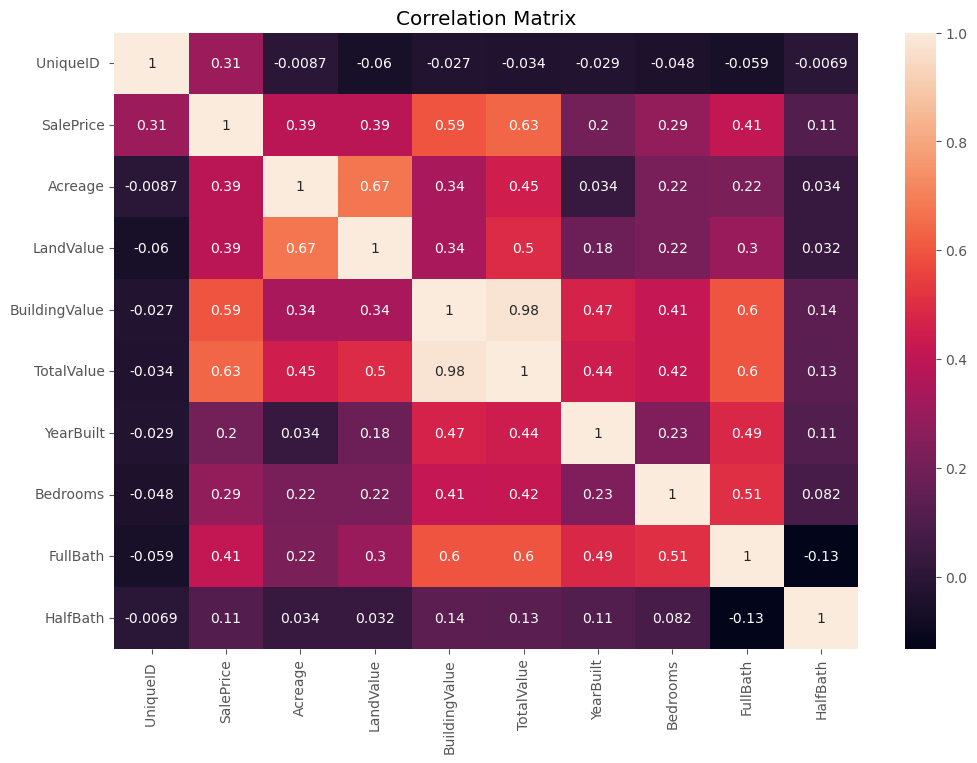

In [69]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

We can observe that Building value and Total value have the highest correlation with each other

In [70]:
corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
corr = sorted_pairs[sorted_pairs > 0.5]
hi_corr = corr[corr < 1]
hi_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_9852\2476705059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


BuildingValue  TotalValue       0.977572
TotalValue     BuildingValue    0.977572
Acreage        LandValue        0.672646
LandValue      Acreage          0.672646
SalePrice      TotalValue       0.633775
TotalValue     SalePrice        0.633775
BuildingValue  FullBath         0.597300
FullBath       BuildingValue    0.597300
               TotalValue       0.595162
TotalValue     FullBath         0.595162
BuildingValue  SalePrice        0.593845
SalePrice      BuildingValue    0.593845
Bedrooms       FullBath         0.505999
FullBath       Bedrooms         0.505999
dtype: float64

The greatest correlation are:

BuildingValue and TotalValue  0.977572

Acreage and LandValue         0.672646

TotalValue and SalePrice      0.633775

FullBath and BuildingValue    0.597300

FullBath and TotalValue       0.595162

BuildingValue and SalePrice   0.593845

FullBath and Bedrooms         0.505999

The amount of Bedrooms with Fullbath influence the Building value and affect the Sale Price.
Also the Acreage influence the Land Value that affect the Total Value of the House and the Sale Price.

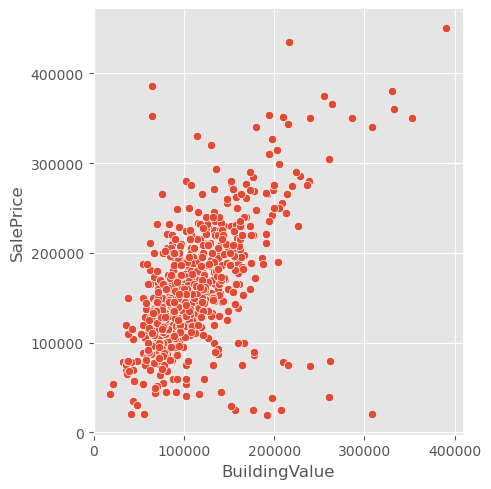

In [71]:
#Exploring the Relationship between Building Value and the Sale price
plot1=sns.relplot(data=df, x='BuildingValue', y='SalePrice', kind='scatter')

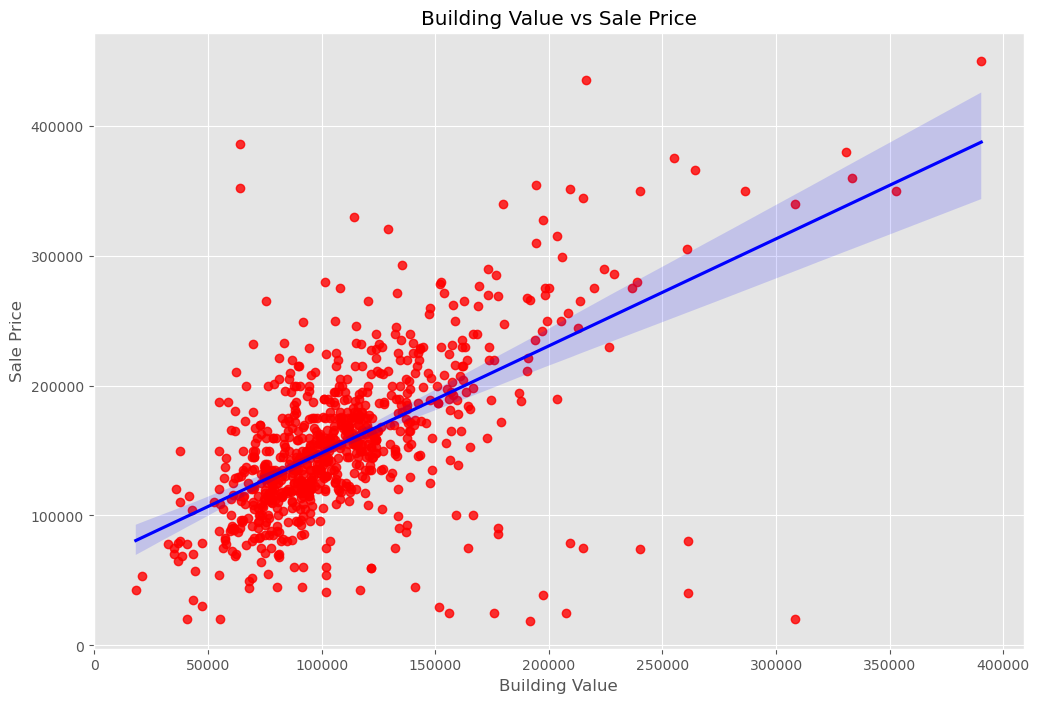

In [72]:
ax = sns.regplot(x='BuildingValue', y='SalePrice', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
ax.set(xlabel='Building Value',
       ylabel='Sale Price',
       title='Building Value vs Sale Price')
plt.show()

Most of the Houses lay on top of the blue line, indicate that those Houses make a profit.

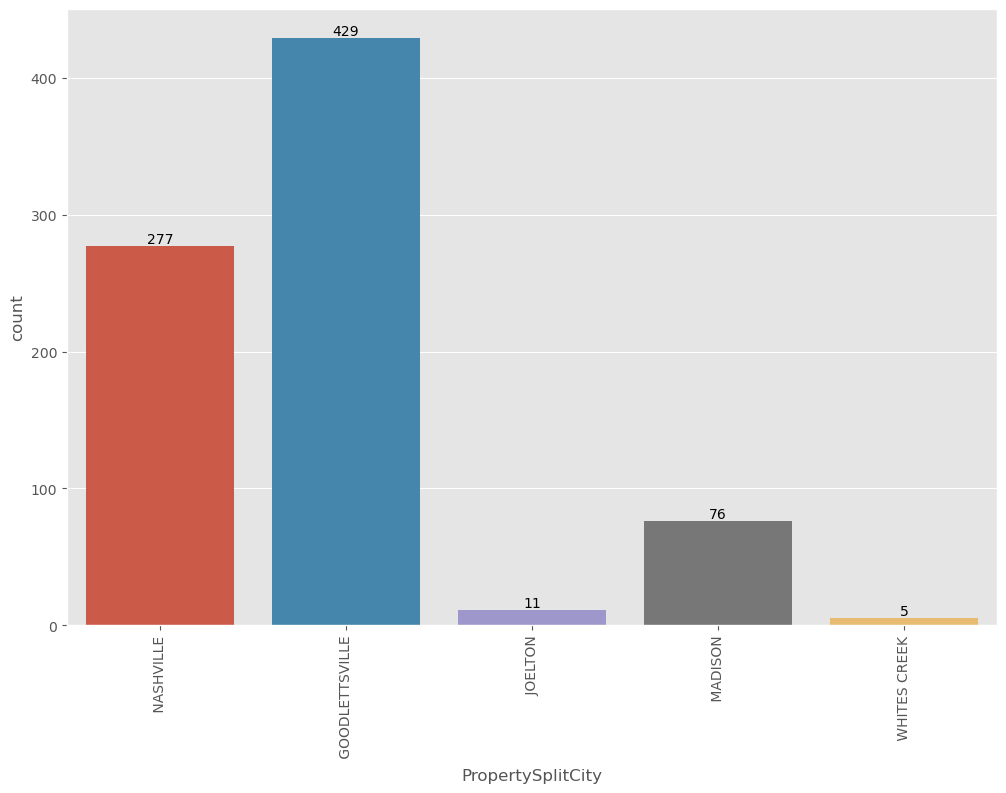

In [73]:
# Number of Houses Sold per City
plot2=sns.countplot(data=df, x='PropertySplitCity')
plot2.set_xticklabels(labels=df['PropertySplitCity'].unique().tolist(),rotation=90)
for i in plot2.containers:
    plot2.bar_label(i,)    
plt.show()

Most property located in Goodlettsville City and the least property located in Whites Creek City.

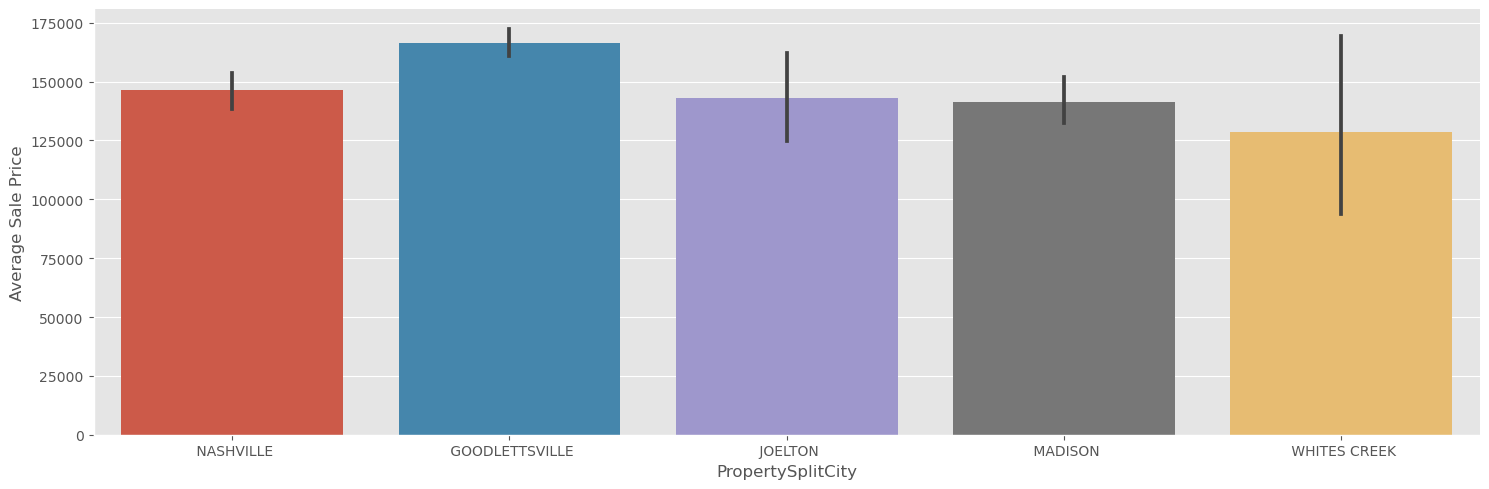

In [74]:
#Home Prices per City
plot3 = sns.catplot(data=df, x='PropertySplitCity', y='SalePrice', estimator='mean', kind='bar', aspect=3)
plot3.set_ylabels('Average Sale Price')
plt.show()

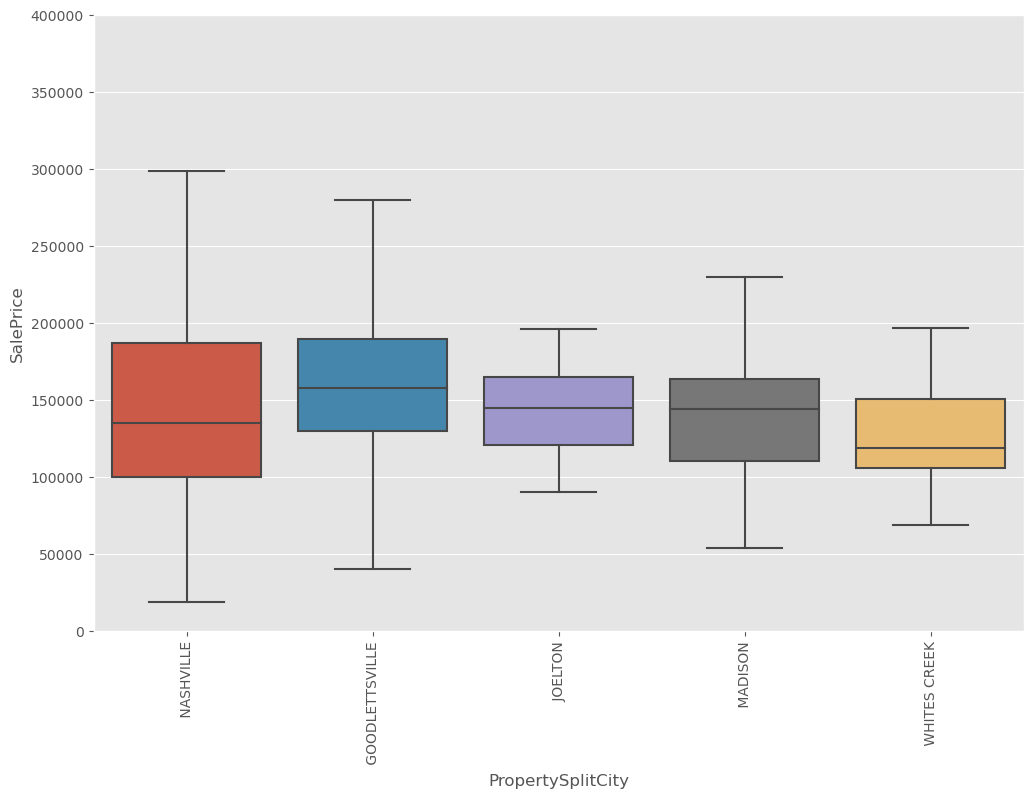

In [75]:
ax = sns.boxplot(data=df, x='PropertySplitCity', y='SalePrice',fliersize=0)
plt.ylim(0, 400000)
ax.set_xticklabels(labels=df['PropertySplitCity'].unique().tolist(),rotation=90)
plt.show()

The range of SalePrice in the data set is most varies in Nashville City, the values between 100.000 to 180.000.

In [76]:
##

In [77]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 9
Float variables: 1


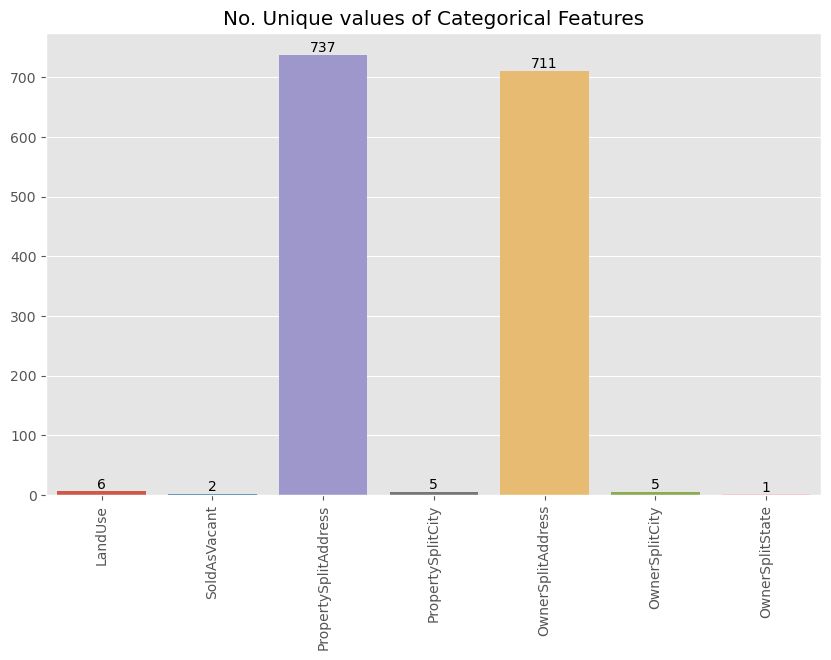

In [78]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
ax = sns.barplot(x=object_cols,y=unique_values)
for i in ax.containers:
    ax.bar_label(i,)

In [79]:
df[['LandUse', 'SoldAsVacant', 'PropertySplitCity', 'OwnerSplitCity']]

,LandUse,SoldAsVacant,PropertySplitCity,OwnerSplitCity
0,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
1,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
2,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
3,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
4,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
...,...,...,...,...
995,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
996,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
997,SINGLE FAMILY,No,NASHVILLE,NASHVILLE
998,SINGLE FAMILY,No,NASHVILLE,NASHVILLE


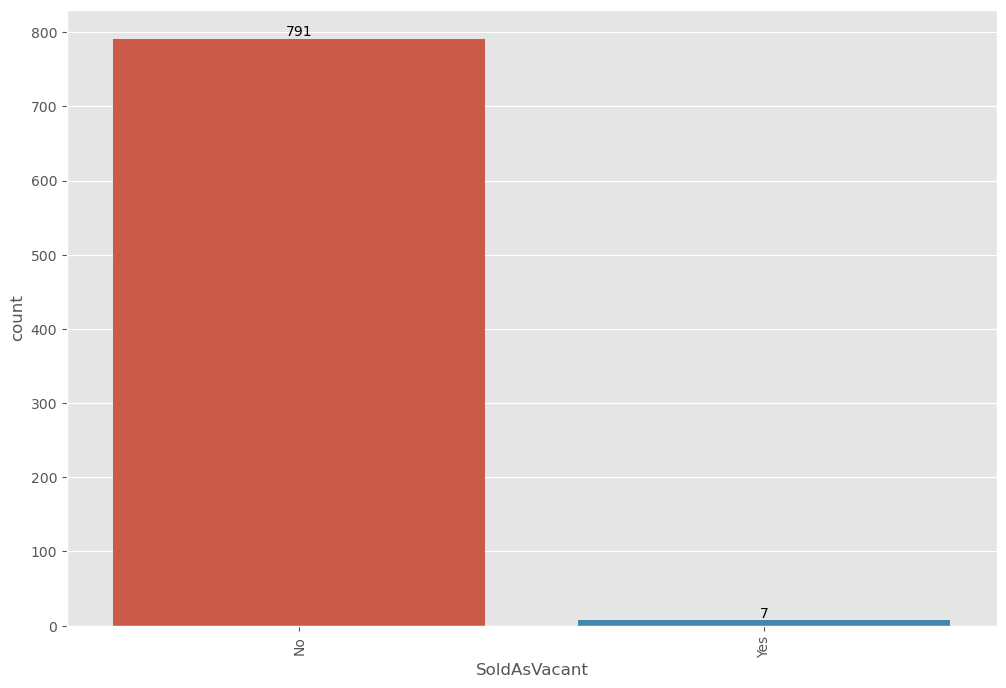

In [100]:
plot2=sns.countplot(data=df, x='SoldAsVacant')
plot2.set_xticklabels(labels=df['SoldAsVacant'].unique().tolist(),rotation=90)
for i in plot2.containers:
    plot2.bar_label(i,)    
plt.show()

In [86]:
LandUse = df['LandUse']
dataframe = pd.DataFrame({'LandUse': LandUse.values,
                          'count': LandUse.count()})
dataframe

,LandUse,count
0,SINGLE FAMILY,798
1,SINGLE FAMILY,798
2,SINGLE FAMILY,798
3,SINGLE FAMILY,798
4,SINGLE FAMILY,798
...,...,...
793,SINGLE FAMILY,798
794,SINGLE FAMILY,798
795,SINGLE FAMILY,798
796,SINGLE FAMILY,798


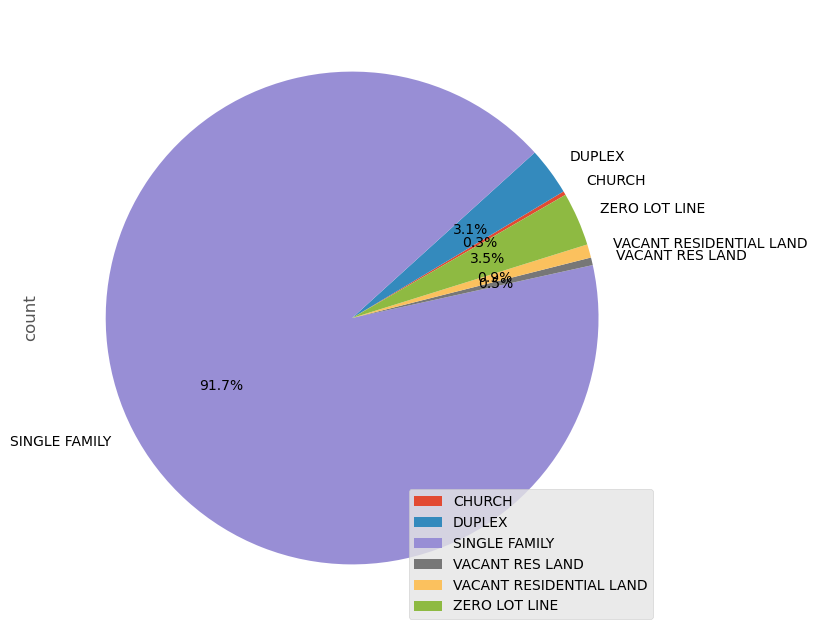

In [96]:
dataframe.groupby(['LandUse']).sum().plot(
    kind='pie', y='count', autopct='%1.1f%%', shadow=False, startangle=30)
plt.show()

Most of the land is use for Single Family and most of the property not sold as vacant.